# 07/10/2020

## Getting started

### Objectives

* discover and know how to write a Python program
* discover and know how to use a notebook
* manipulate variables

### Code cells

* The two cells containing codes should be:

In [1]:
40 + 2

42

In [2]:
year = 2020
course = "FTIP"
print(course + " " + str(year))

FTIP 2020


### Markdown cell

The markdown code
  
```
  Write **bold**, _italic_ or equations: $\sqrt{2}$.
```

produces:

---
  
  Write **bold**, _italic_ or equations: $\sqrt{2}$.
  
---

## Display a saved image

### Objectives

* use functions and modules
* know how to load and display an image, and use a colormap
* display the size of an image
* convert an image to grayscale
* understand that an image is also a 2D signal

### Modules

The use of the function `ccc` available in the submodule `bbb` of the module `aaa` writes `aaa.bbb.ccc`.
I am sure you agree this is a bit long to write, that is why we usually rename the submodule to something shorter.
Thus, the following instructions rename `skimage.io` to` io`, and `matplotlib.pyplot` to` plt`:

In [3]:
import skimage.io as io
import matplotlib.pyplot as plt

The three modules used in this course are:
* [Numpy](http://www.numpy.org/) (scientific programming),
* [Scikit-image](https://scikit-image.org/) (image processing),
* [Matplotlib](https://matplotlib.org/) (display).

Refer to the documentation on these websites to get the syntax of the functions.

### Display the color image

Now you can load the image mandrill.tiff (I load it directly from the website):

In [4]:
f = io.imread("http://sipi.usc.edu/database/download.php?vol=misc&img=4.2.03")

and display it (I take this opportunity to add a title):

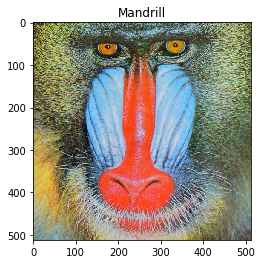

In [5]:
plt.imshow(f)
plt.title('Mandrill');

The image dimensions can be read on the displayed image: a little more than 500 pixels per side, and 3 bands since the image is in color.
A more precise alternative is to use the `shape` function:

In [6]:
print(f.shape)

(512, 512, 3)


So the image if of size 512 × 512, with 3 bands.

### Conversion to grayscale

We need to import a new module (I am doing this at this point, but it is recommended to import all modules at the beginning of the notebook).

Text(0.5, 1.0, 'Mandrill (grayscale)')

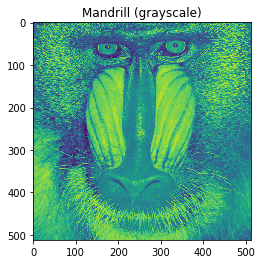

In [7]:
import skimage.color as color

g = color.rgb2gray(f)
plt.imshow(g)
plt.title('Mandrill (grayscale)')

What's that weird grayscale image? It's rather green... 😲

Actually, this does be a grayscale image (the image has only one band).
But the default colormap with `imshow` is a gradient of blue and green.
To display it in real gray levels, you must specify the option `cmap` in` imshow`.
A large number of palettes are available see. [catalog](https://matplotlib.org/examples/color/colormaps_reference.html));
here we choose the classic `gray`:

Text(0.5, 1.0, 'Mandrill (grayscale)')

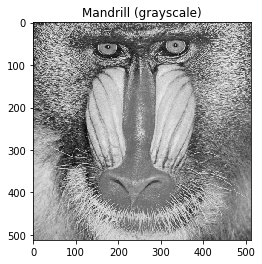

In [8]:
plt.imshow(g, cmap="gray")
plt.title('Mandrill (grayscale)')

Phew! 😅

The grayscale image has intensities in this range:

In [9]:
print("Min : " + str(g.min()))
print("Max : " + str(g.max()))

Min : 0.0
Max : 0.9116803921568628


One can also redefine the range of colors by specifying the intensities corresponding to black (`vmin`) and white (` vmax`):

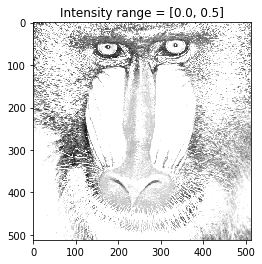

In [10]:
plt.imshow(g, vmin=0.0, vmax=0.5, cmap="gray");
plt.title("Intensity range = [0.0, 0.5]");

### Brightness profile

I choose a horizontal cut on the 200<sup>th</sup> line of the image:

In [11]:
cut = 200          # Cut location
profil = g[cut,:]  # Extract all the pixels of the row 'cut' in the image g

Now we can display the brightness profile...

Text(0.5, 1.0, 'Mandrill')

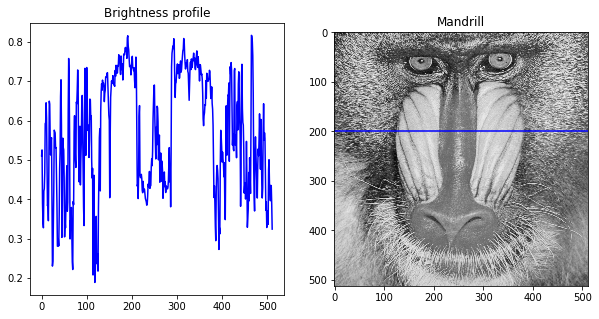

In [12]:
plt.figure(figsize=(10,5))           # New figure with specific display size

plt.subplot(1,2,1)                   # Plot on the left
plt.plot(profil,'b')                 # Brightness profile
plt.title("Brightness profile")      # Title

plt.subplot(1,2,2)                   # Image on the right
plt.imshow(g, cmap="gray")           # Image
plt.plot((0,511), (cut,cut), 'b')    # Cut line in blue
plt.title("Mandrill")                # Title

Do you see on the profile the Mandrill's nose and the protruding ridges on its sides?